In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime

In [2]:
# Purpose: Analyze input Pandas DataFrame and return stats per column
# Details: The function calculates levels for categorical variables and allows to analyze summarized information
    
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Uniques' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [ ]:
df = pd.read_csv("/Users/thienla/2024HelpDeskTickets.csv")

In [4]:
df.shape

(4964, 11)

In [5]:
pd.options.display.max_colwidth = 200
pd.options.display.max_rows = 70
desc_df = describe_more(df)
desc_df

,A_Variable,Uniques,Datatype,Min Length,Max Length,Level_Values
0,Subject,4286,object,1,198,"{'Adobe Upgrade': 82, 'Your Repaired Unit Is On Its Way to You': 24, 'Returning Old Laptop': 14, 'Please review your Azure billing statement for Pay-As-You-Go': 12, 'Alert **CLEARED** - SAC - RA3E..."
1,Category,10,object,1,15,"{'-': 1883, 'Software': 883, 'Hardware': 742, 'Access': 697, 'Security': 211, 'Meetings/Zoom': 196, 'Email': 193, 'New Hire': 62, 'Termination': 56, 'Purchase Orders': 40}"
2,Priority,5,object,1,9,"{'Low': 1885, '-': 1774, 'Medium': 547, 'Executive': 489, 'High': 268}"
3,Ticket Owner,14,object,3,14,"{'Max Franz': 931, 'Eric Willson': 736, 'Jason Tom': 731, 'Steven Squier': 703, 'Phillip Davis': 461, 'Kenneth King': 377, 'Unassigned': 313, 'Jerry Itoh': 249, 'Gary Pitman': 237, 'Kamyar Zabeti'..."
4,Status,4,object,3,22,"{'Closed': 4718, 'Open': 223, 'Assigned - On Hold': 19, 'Assigned - In Progress': 3}"
5,Created Time,4787,object,3,17,"{'09 Oct 2024 17:36': 6, '11 Oct 2024 10:07': 6, '07 Feb 2024 18:05': 5, '09 Oct 2024 17:33': 5, '24 May 2024 11:40': 4, '06 Aug 2024 16:00': 4, '08 Oct 2024 14:52': 4, '24 Oct 2024 15:04': 4, '09..."
6,Modified Time,3829,object,3,17,"{'05 Nov 2024 10:08': 50, '05 Nov 2024 10:11': 49, '05 Nov 2024 10:14': 49, '05 Nov 2024 10:16': 45, '14 Aug 2024 12:16': 34, '20 Dec 2024 10:40': 15, '09 Jul 2024 11:27': 14, '16 Jul 2024 12:41':..."
7,Created By,12,object,3,14,"{'Alan Lee': 4159, 'Steven Squier': 181, 'Phillip Davis': 171, 'Kenneth King': 139, 'Eric Willson': 127, 'Jason Tom': 67, 'Max Franz': 65, 'Kamyar Zabeti': 28, 'Tatiana Lee': 15, 'Gary Pitman': 5,..."
8,Resolution Time in Business Hours,852,object,1,8,"{'-': 236, '1w 0d': 108, '1mos 0w': 92, '1w 1d': 68, '1mos 1w': 62, '3w 5d': 61, '1w 5d': 59, '00:01:00': 55, '1mos 2w': 54, '1w 4d': 54, '1w 6d': 53, '2w 0d': 52, '1mos 3w': 49, '1w 3d': 45, '1d ..."
9,Ticket Description,148,object,3,10180,"{'Checklist: Install Zscaler Software on Laptop Login to Zscaler desktopInstall Zscaler Software on iPhone Login to Zscaler mobile Answer any questions about using Zscaler': 6, 'Tasks to-do (rough..."


In [6]:
df.describe(include='O').T

,count,unique,top,freq
Subject,4964,4286,Adobe Upgrade,82
Category,4963,10,-,1883
Priority,4963,5,Low,1885
Ticket Owner,4963,14,Max Franz,931
Status,4963,4,Closed,4718
Created Time,4963,4787,09 Oct 2024 17:36,6
Modified Time,4963,3829,05 Nov 2024 10:08,50
Created By,4963,12,Alan Lee,4159
Resolution Time in Business Hours,4963,852,-,236
Ticket Description,154,148,Checklist:\nInstall Zscaler Software on Laptop\nLogin to Zscaler desktopInstall Zscaler Software on iPhone\nLogin to Zscaler mobile\nAnswer any questions about using Zscaler,6


In [7]:
# Remove unused columns
df.drop(['Ticket Description'], axis = 1, inplace=True)

----

### Date Preparation

In [8]:
# Clean column names - remove spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
df['status'] = df['status'].str.replace('-', '_')
df['subject'] = df['status'].str.replace('-', '_')

In [10]:
# Convert all uppercase values to lowercase
def to_lowercase(value):
    if isinstance(value, str):
        return value.lower()
    return value

# Apply the lowercase conversion to all columns in the dataframe
for column in df.columns:
    df[column] = df[column].apply(to_lowercase)

In [ ]:
# Function to combine similar values in a column
def combine_similar_values(df, column_name):
    """
    Combines similar values in a specified column of a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to process
    column_name (str): The column name to clean
    
    Returns:
    pandas.DataFrame: DataFrame with cleaned values
    """
    # Create a copy to avoid modifying the original DataFrame
    result_df = df.copy()
    
    # Skip processing if the column doesn't exist
    if column_name not in result_df.columns:
        print(f"Column '{column_name}' not found in DataFrame")
        return result_df
    
    # Get unique values in the column
    unique_values = result_df[column_name].dropna().unique()
    
    # Dictionary to store mapping of similar values
    mapping = {}
    
    # For text values, we'll use string similarity
    if result_df[column_name].dtype == 'object':
        from difflib import SequenceMatcher
        
        # Compare each pair of unique values
        for i, val1 in enumerate(unique_values):
            if val1 in mapping:
                continue
                
            mapping[val1] = val1  # Map to itself initially
            
            for val2 in unique_values[i+1:]:
                if val2 in mapping:
                    continue
                    
                # Calculate similarity ratio
                similarity = SequenceMatcher(None, str(val1).lower(), str(val2).lower()).ratio()
                
                # If values are similar above threshold
                if similarity > 0.8:  # You can adjust this threshold
                    mapping[val2] = val1  # Map similar value to the first one
    
    # Apply the mapping to replace similar values
    if mapping:
        result_df[column_name] = result_df[column_name].map(lambda x: mapping.get(x, x))
    
    return result_df

# Processing multiple columns
def clean_multiple_columns(df, columns):
    result = df.copy()
    for column in columns:
        result = combine_similar_values(result, column)
    return result

In [ ]:
# Columns benefit from standardization
columns_to_clean = ['subject', 'category', 'priority', 'ticket_owner', 'status', 'created_by']

# Clean the data
cleaned_df = clean_multiple_columns(df, columns_to_clean)

# Check the results
for column in columns_to_clean:
    if column in df.columns:
        print(f"\nOriginal unique values in {column}:")
        print(df[column].value_counts())
        
        print(f"\nCleaned unique values in {column}:")
        print(cleaned_df[column].value_counts())


Original unique values in subject:
subject
adobe upgrade                                                                                                         83
your repaired unit is on its way to you                                                                               24
unionware                                                                                                             16
returning old laptop                                                                                                  14
alert **cleared** - sac - ra3e - eab65d                                                                               12
                                                                                                                      ..
fw: phone/wifi dropped calls                                                                                           1
new employee, phone access, credentials                                                                      

In [13]:
# Convert time columns to datetime format
time_columns = ['created_time', 'modified_time']
for col in time_columns:
    cleaned_df[col] = pd.to_datetime(cleaned_df[col], format='%d %b %Y %H:%M', errors='coerce')

In [ ]:
# Covert to hours
import re

def convert_to_hours(time_str):
    if pd.isna(time_str) or time_str == '-':
        return None
    
    # Handle months format (e.g., "3mos 0w")
    if 'mos' in time_str:
        months_match = re.search(r'(\d+)mos', time_str)
        weeks_match = re.search(r'(\d+)w', time_str)
        
        months = int(months_match.group(1)) if months_match else 0
        weeks = int(weeks_match.group(1)) if weeks_match else 0
        
        # Approximate a month as 4 weeks * 5 business days * 8 hours
        return (months * 30 * 24) + (weeks * 7 * 24)
    
    # Handle days format (e.g., "2d 23h")
    if 'd' in time_str:
        days_match = re.search(r'(\d+)d', time_str)
        hours_match = re.search(r'(\d+)h', time_str)
        
        days = int(days_match.group(1)) if days_match else 0
        hours = int(hours_match.group(1)) if hours_match else 0
        
        # Convert to business hours (8 hours per day)
        return (days * 24) + hours
    
    # Handle HH:MM:SS format (e.g., "01:54:00")
    if ':' in time_str:
        parts = time_str.split(':')
        if len(parts) == 3:
            hours, minutes, seconds = map(int, parts)
        elif len(parts) == 2:
            hours, minutes = map(int, parts)
            seconds = 0
        
        return hours + minutes/60 + seconds/3600
    
    return None

# Apply the conversion to both columns
cleaned_df['resolution_hours'] = cleaned_df['resolution_time_in_business_hours'].apply(convert_to_hours)

# For easier analysis, create a response time in minutes column
cleaned_df['response_minutes'] = cleaned_df['total_response_time_in_business_hours'].apply(convert_to_hours) * 60

# Preview the converted data
print(cleaned_df[['resolution_time_in_business_hours', 'resolution_hours', 
          'total_response_time_in_business_hours', 'response_minutes']])

     resolution_time_in_business_hours  resolution_hours  \
0                               2d 23h             71.00   
1                               2d 23h             71.00   
2                             01:54:00              1.90   
3                                3d 8h             80.00   
4                              3mos 0w           2160.00   
...                                ...               ...   
4959                                 -               NaN   
4960                          01:21:00              1.35   
4961                                 -               NaN   
4962                                 -               NaN   
4963                               NaN               NaN   

     total_response_time_in_business_hours  response_minutes  
0                                 00:44:00              44.0  
1                                 00:34:00              34.0  
2                                        -               NaN  
3                          

In [15]:
print(f"Duplicated values")
print(cleaned_df.duplicated().sum())

Duplicated values
7


In [16]:
print(f"Null values")
print(cleaned_df.isnull().sum())

Null values
subject                                     0
category                                    1
priority                                    1
ticket_owner                                1
status                                      1
created_time                                1
modified_time                               1
created_by                                  1
resolution_time_in_business_hours           1
total_response_time_in_business_hours       1
resolution_hours                          237
response_minutes                         1026
dtype: int64


In [17]:
# Remove the last row which contains the total count
cleaned_df = cleaned_df[~cleaned_df['subject'].str.contains('total records', na=False)]

# Handle duplicate values
cleaned_df = cleaned_df.drop_duplicates()

# Remove rows with NaN values in critical columns if necessary
cleaned_df = cleaned_df.dropna(subset=['ticket_owner', 'status'])

# Handle missing values
cleaned_df = cleaned_df.replace(regex=['-'], value='unassigned')

# Print the first few rows of the cleaned dataset
cleaned_df.head()

,subject,category,priority,ticket_owner,status,created_time,modified_time,created_by,resolution_time_in_business_hours,total_response_time_in_business_hours,resolution_hours,response_minutes
0,fw: attn: accounts payable,unassigned,unassigned,rene lim,closed,2024-01-02 09:21:00,2024-01-05 08:58:00,alan lee,2d 23h,00:44:00,71.0,44.0
1,fw: kindly check your recent purchase.,unassigned,unassigned,rene lim,closed,2024-01-02 09:26:00,2024-01-05 08:53:00,alan lee,2d 23h,00:34:00,71.0,34.0
2,today's comms meeting,meetings/zoom,medium,eric willson,closed,2024-01-02 09:27:00,2024-01-02 11:22:00,alan lee,01:54:00,unassigned,1.9,NaN
3,fwd: laptop cord,hardware,low,max franz,closed,2024-01-02 09:29:00,2024-01-05 18:03:00,alan lee,3d 8h,02:43:00,80.0,163.0
4,heads up on 2 new hires,new hire,medium,unassigned,closed,2024-01-02 09:42:00,2024-04-04 12:27:00,alan lee,3mos 0w,unassigned,2160.0,NaN


----

#### EDA

#### Numerical Variables

In [167]:
# Basic statistics for numerical variables
num_stats = cleaned_df[['resolution_hours', 'response_minutes']].describe()
print("Basic Statistics:\n", num_stats)

Basic Statistics:
        resolution_hours  response_minutes
count       4720.000000       3938.000000
mean         197.348679       1322.210005
std          575.352444       6654.548179
min            0.000000          0.000000
25%            1.050000         12.000000
50%           18.575000         53.000000
75%           96.000000        366.750000
max         7368.000000     169920.000000


In [18]:
cleaned_df['response_minutes'].value_counts()

response_minutes
1.0       212
2.0       114
3.0        90
4.0        83
6.0        74
         ... 
1336.0      1
1421.0      1
1364.0      1
540.0       1
632.0       1
Name: count, Length: 730, dtype: int64

In [19]:
cleaned_df['resolution_hours'].value_counts()

resolution_hours
0.000000      213
24.000000     166
120.000000    164
144.000000    124
96.000000     115
             ... 
23.883333       1
7.016667        1
13.516667       1
20.066667       1
13.183333       1
Name: count, Length: 828, dtype: int64

#### Categorical Variables

In [21]:
cleaned_df['created_by'].value_counts()

created_by
alan lee          4152
steven squier      181
phillip davis      171
kenneth king       139
eric willson       127
jason tom           67
max franz           65
kamyar zabeti       28
tatiana lee         15
gary pitman          5
larry jennings       5
rene lim             1
Name: count, dtype: int64

In [166]:
cleaned_df['subject'].value_counts()

subject
adobeupgrade                                                       85
fw: broadcast: 124414690 unassigned 155 grand ave unassigned tr    36
mitel voice message from +17087173404 for mailbox 2203             34
blocked email?                                                     26
your repaired unit is on its way to you                            24
                                                                   ..
messages not loading on iunassignedphone                            1
missing audio devices                                               1
request for support to print at office                              1
fwd: oil & energy industry,                                         1
lenovo case 2022771058                                              1
Name: count, Length: 3490, dtype: int64

In [23]:
# Ticket distribution by owner
owner_counts = cleaned_df['ticket_owner'].value_counts()
print("\nTicket Distribution by Owner:\n", owner_counts)

# Ticket distribution by status
status_counts = cleaned_df['status'].value_counts()
print("\nTicket Distribution by Status:\n", status_counts)


Ticket Distribution by Owner:
 ticket_owner
max franz         931
eric willson      735
jason tom         731
steven squier     703
phillip davis     461
kenneth king      377
unassigned        307
jerry itoh        249
gary pitman       237
kamyar zabeti     148
tatiana lee        31
rene lim           24
alan lee           14
larry jennings      8
Name: count, dtype: int64

Ticket Distribution by Status:
 status
closed                    4711
open                       223
assigned _ on hold          19
assigned _ in progress       3
Name: count, dtype: int64



Ticket Distribution by Category:
 category
unassigned         1876
software            883
hardware            742
access              697
security            211
meetings/zoom       196
email               193
new hire             62
termination          56
purchase orders      40
Name: count, dtype: int64

Ticket Distribution by Priority:
 priority
low           1885
unassigned    1767
medium         547
executive      489
high           268
Name: count, dtype: int64


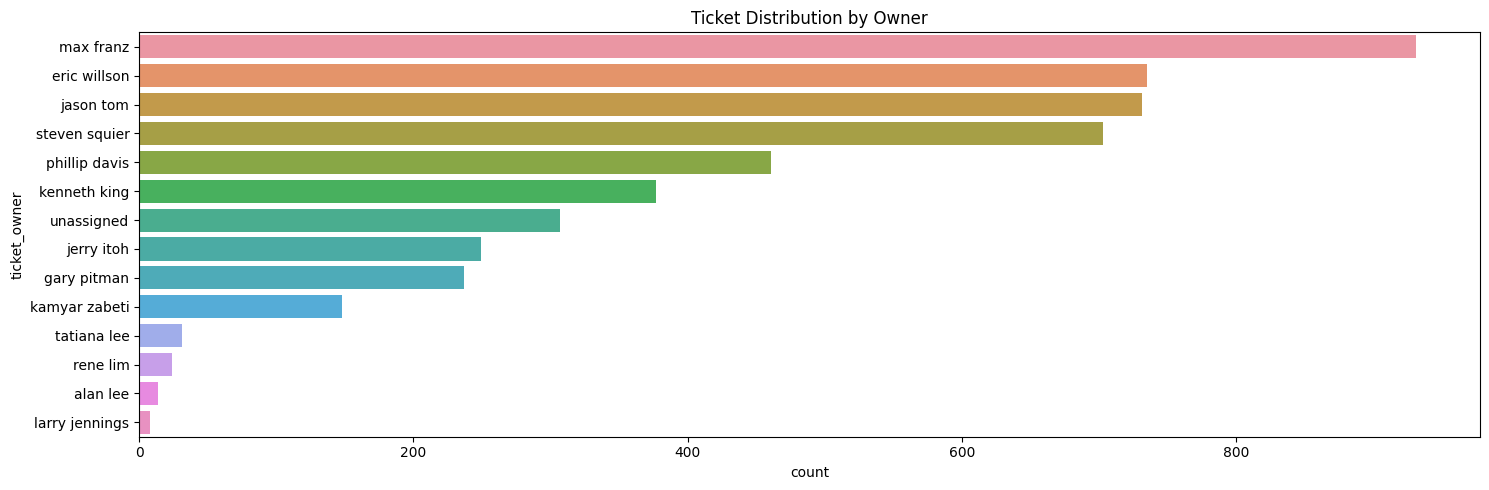

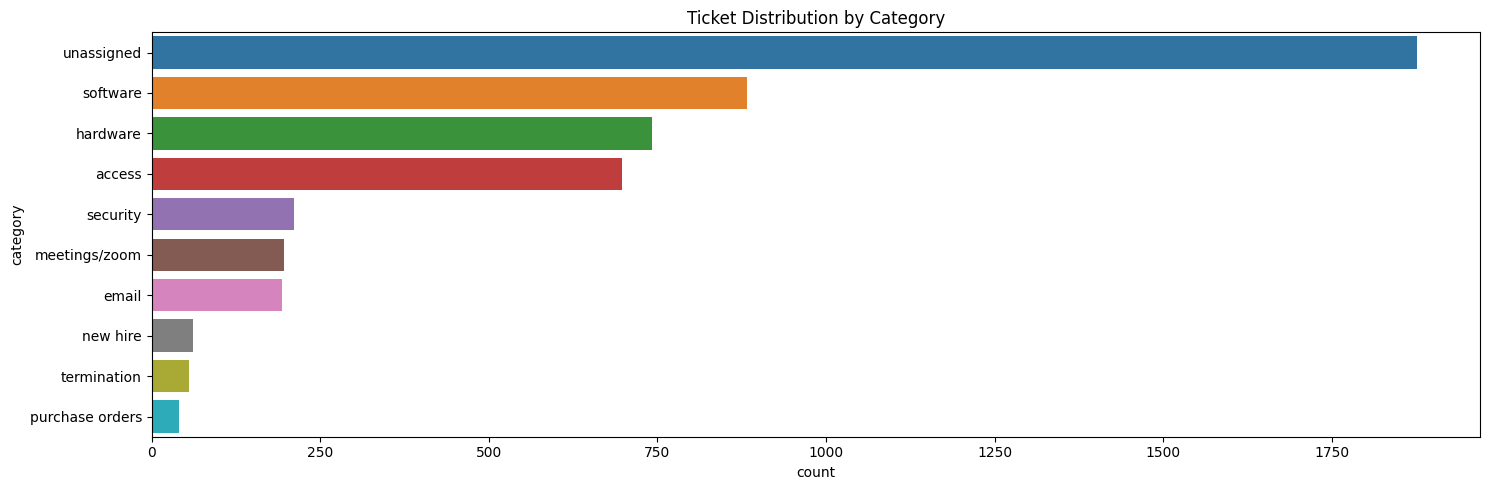

In [184]:
# Ticket distribution by category
category_counts = cleaned_df['category'].value_counts()
print("\nTicket Distribution by Category:\n", category_counts)

# Ticket distribution by priority
priority_counts = cleaned_df['priority'].value_counts()
print("\nTicket Distribution by Priority:\n", priority_counts)

# Visualization
plt.figure(figsize=(15, 5))
sns.countplot(y='ticket_owner', data=cleaned_df, order=owner_counts.index)
plt.title('Ticket Distribution by Owner')
plt.tight_layout()

plt.figure(figsize=(15, 5))
sns.countplot(y='category', data=cleaned_df, order=category_counts.index)
plt.title('Ticket Distribution by Category')
plt.tight_layout()

----

#### Performance Metrics Analysis

In [25]:
# Calculate average resolution time per ticket owner
avg_resolution_by_owner = cleaned_df.groupby('ticket_owner')['resolution_hours'].mean().reset_index()
avg_resolution_by_owner = avg_resolution_by_owner.sort_values('resolution_hours')
print("\nAverage Resolution Hours by Owner:\n", avg_resolution_by_owner)

# Calculate average response time per ticket owner
avg_response_by_owner = cleaned_df.groupby('ticket_owner')['response_minutes'].mean().reset_index()
avg_response_by_owner = avg_response_by_owner.sort_values('response_minutes')
print("\nAverage Response Minutes by Owner:\n", avg_response_by_owner)


Average Resolution Hours by Owner:
       ticket_owner  resolution_hours
7   larry jennings         26.144444
4       jerry itoh         30.001473
12     tatiana lee         34.963462
0         alan lee         37.840000
5    kamyar zabeti         54.465185
1     eric willson         94.620509
3        jason tom        112.642699
10        rene lim        115.379167
11   steven squier        141.777537
6     kenneth king        156.069982
9    phillip davis        200.767560
8        max franz        254.176483
13      unassigned        454.322944
2      gary pitman        761.606999

Average Response Minutes by Owner:
       ticket_owner  response_minutes
7   larry jennings        665.000000
4       jerry itoh        674.808219
8        max franz        955.680974
1     eric willson        979.466448
11   steven squier       1008.905172
3        jason tom       1045.973354
12     tatiana lee       1178.516129
5    kamyar zabeti       1415.758865
9    phillip davis       1962.649596
2

In [ ]:
# Calculate ticket closure rate by owner
# First, get total tickets by owner
total_tickets_by_owner = cleaned_df['ticket_owner'].value_counts().reset_index()
total_tickets_by_owner.columns = ['ticket_owner', 'total_tickets']
#print("\nTotal Tickets by Owner:\n", total_tickets_by_owner)

# Then, get closed tickets by owner
closed_tickets = cleaned_df[cleaned_df['status'] == 'closed']
closed_tickets_by_owner = closed_tickets['ticket_owner'].value_counts().reset_index()
closed_tickets_by_owner.columns = ['ticket_owner', 'closed_tickets']
print("\nClosed Tickets by Owner:\n", closed_tickets_by_owner)


Total Tickets by Owner:
       ticket_owner  total_tickets
0        max franz            931
1     eric willson            735
2        jason tom            731
3    steven squier            703
4    phillip davis            461
5     kenneth king            377
6       unassigned            307
7       jerry itoh            249
8      gary pitman            237
9    kamyar zabeti            148
10     tatiana lee             31
11        rene lim             24
12        alan lee             14
13  larry jennings              8

Closed Tickets by Owner:
       ticket_owner  closed_tickets
0        max franz             813
1     eric willson             720
2        jason tom             693
3    steven squier             692
4    phillip davis             445
5     kenneth king             377
6       unassigned             300
7       jerry itoh             249
8      gary pitman             231
9    kamyar zabeti             133
10     tatiana lee              26
11        rene li

In [27]:
# Merge and calculate closure rate
closure_rate = pd.merge(total_tickets_by_owner, closed_tickets_by_owner, on='ticket_owner', how='left')
closure_rate['closure_rate'] = closure_rate['closed_tickets'] / closure_rate['total_tickets'] * 100
print(closure_rate)

      ticket_owner  total_tickets  closed_tickets  closure_rate
0        max franz            931             813     87.325456
1     eric willson            735             720     97.959184
2        jason tom            731             693     94.801642
3    steven squier            703             692     98.435277
4    phillip davis            461             445     96.529284
5     kenneth king            377             377    100.000000
6       unassigned            307             300     97.719870
7       jerry itoh            249             249    100.000000
8      gary pitman            237             231     97.468354
9    kamyar zabeti            148             133     89.864865
10     tatiana lee             31              26     83.870968
11        rene lim             24              24    100.000000
12        alan lee             14               5     35.714286
13  larry jennings              8               3     37.500000


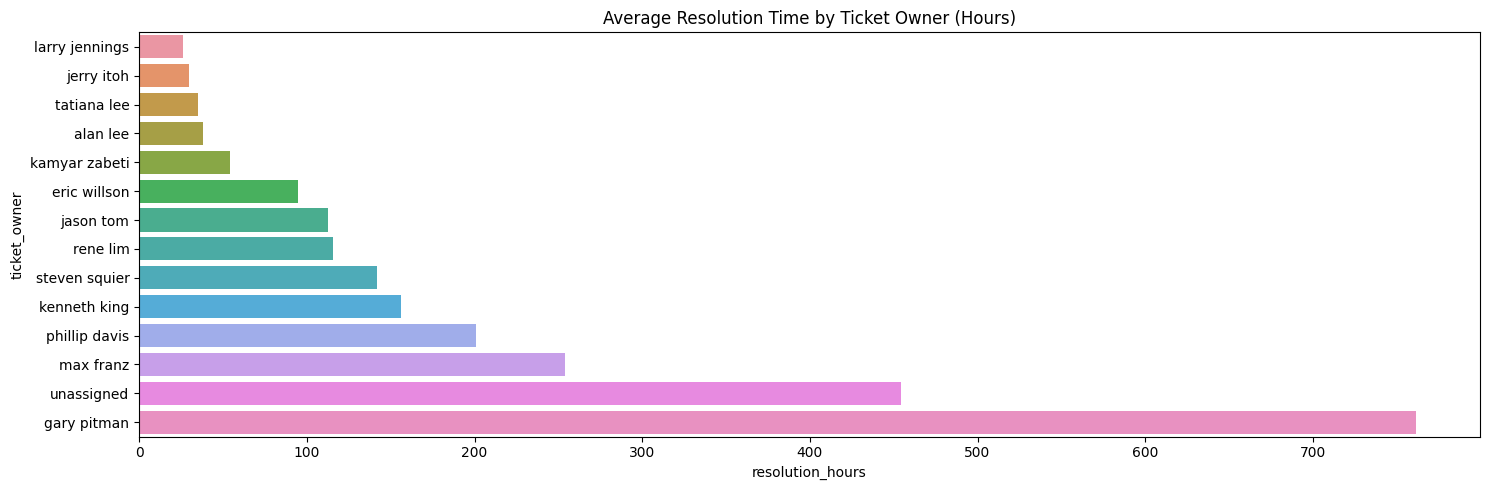

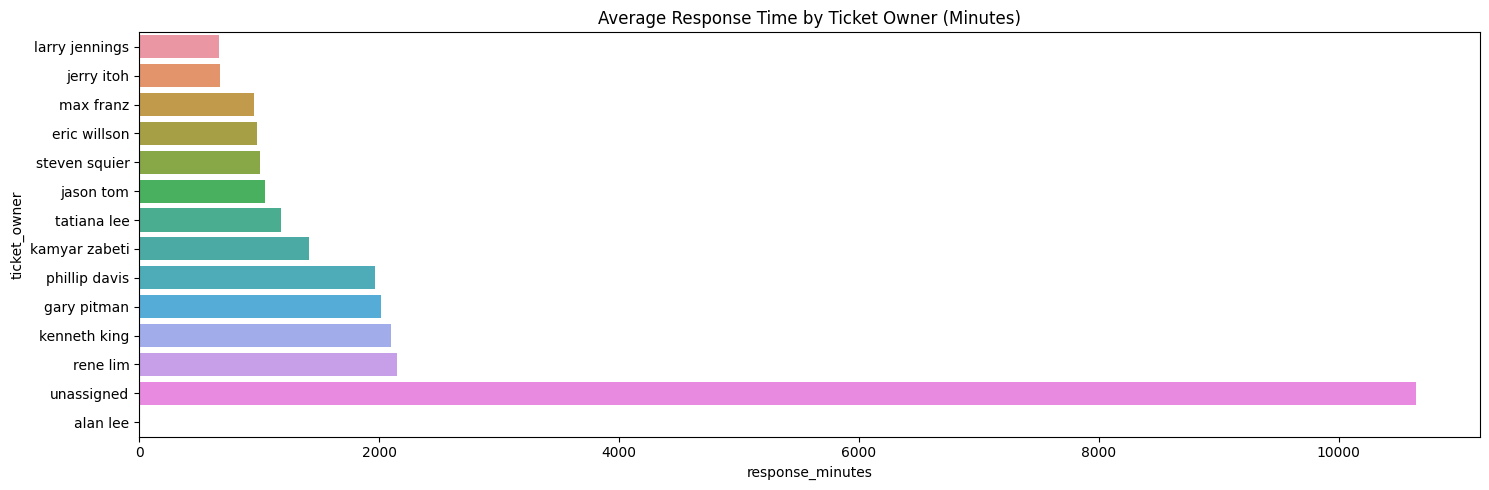

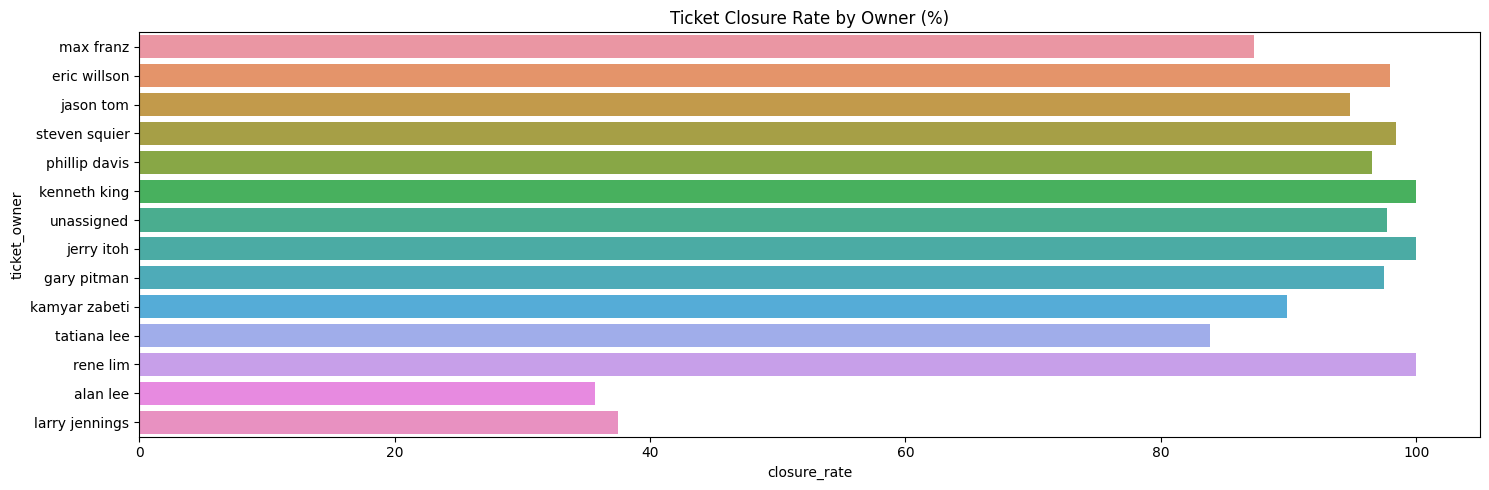

In [ ]:
# Visualize performance metrics
plt.figure(figsize=(15, 5))
sns.barplot(x='resolution_hours', y='ticket_owner', data=avg_resolution_by_owner)
plt.title('Average Resolution Time by Ticket Owner (Hours)')
plt.tight_layout()

plt.figure(figsize=(15, 5))
sns.barplot(x='response_minutes', y='ticket_owner', data=avg_response_by_owner)
plt.title('Average Response Time by Ticket Owner (Minutes)')
plt.tight_layout()

plt.figure(figsize=(15, 5))
sns.barplot(x='closure_rate', y='ticket_owner', data=closure_rate)
plt.title('Ticket Closure Rate by Owner (%)')
plt.tight_layout()

----

#### Trend Analysis

In [ ]:
# Create date-only column for trend analysis
cleaned_df['created_date'] = cleaned_df['created_time'].dt.date

# Tickets created over time
tickets_over_time = cleaned_df.groupby('created_date').size().reset_index()
tickets_over_time.columns = ['date', 'ticket_count']
print(tickets_over_time)

# Resolution time trend over time
resolution_trend = cleaned_df.groupby('created_date')['resolution_hours'].mean().reset_index()
print(resolution_trend)

# Response time trend over time
response_trend = cleaned_df.groupby('created_date')['response_minutes'].mean().reset_index()
print(response_trend)

           date  ticket_count
0    2024-01-02            22
1    2024-01-03            31
2    2024-01-04            26
3    2024-01-05            36
4    2024-01-06             1
..          ...           ...
304  2024-12-25             1
305  2024-12-26             3
306  2024-12-27             5
307  2024-12-30            10
308  2024-12-31             2

[309 rows x 2 columns]
    created_date  resolution_hours
0     2024-01-02        125.829545
1     2024-01-03        317.041398
2     2024-01-04         91.273077
3     2024-01-05        268.965741
4     2024-01-06         76.000000
..           ...               ...
304   2024-12-25         13.183333
305   2024-12-26          0.033333
306   2024-12-27         51.854167
307   2024-12-30         15.073333
308   2024-12-31               NaN

[309 rows x 2 columns]
    created_date  response_minutes
0     2024-01-02         85.375000
1     2024-01-03       1384.555556
2     2024-01-04        885.095238
3     2024-01-05       1294.7352

In [173]:
resolution_trend['resolution_hours'].max()

1944.0

In [58]:
resolution_trend[resolution_trend['resolution_hours'] == 1944]

,created_date,resolution_hours
163,2024-07-11,1944.0


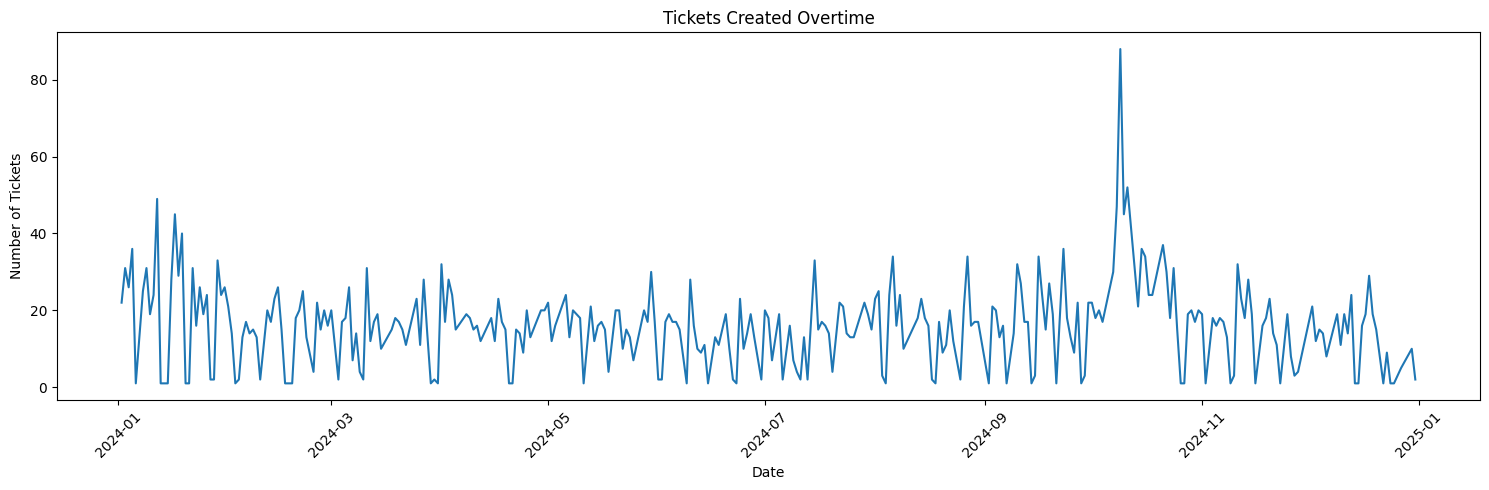

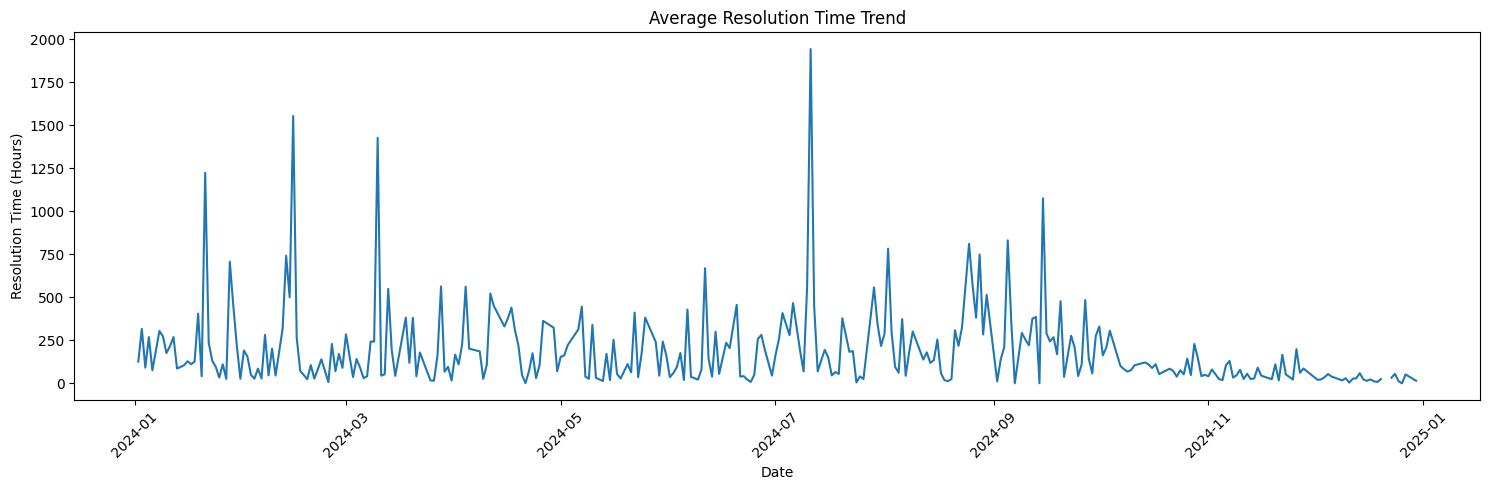

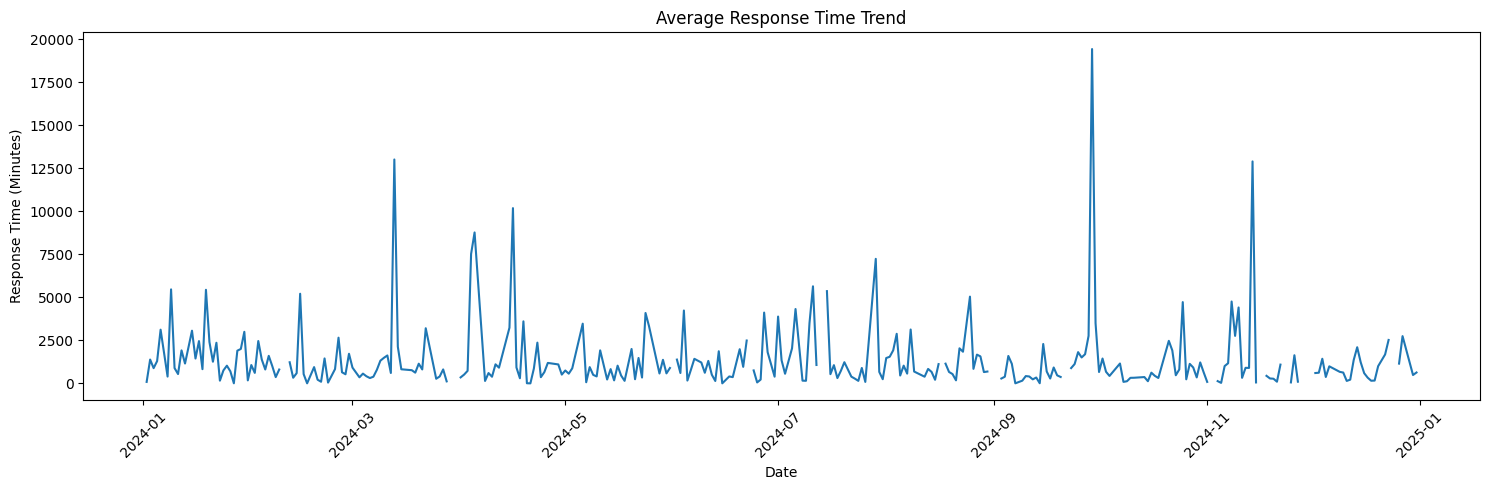

In [174]:
# Visualize trends
plt.figure(figsize=(15, 5))
plt.plot(tickets_over_time['date'], tickets_over_time['ticket_count'])
plt.title('Tickets Created Overtime')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(15, 5))
plt.plot(resolution_trend['created_date'], resolution_trend['resolution_hours'])
plt.title('Average Resolution Time Trend')
plt.xlabel('Date')
plt.ylabel('Resolution Time (Hours)')
plt.xticks(rotation=45)
plt.tight_layout()


plt.figure(figsize=(15, 5))
plt.plot(response_trend['created_date'], response_trend['response_minutes'])
plt.title('Average Response Time Trend')
plt.xlabel('Date')
plt.ylabel('Response Time (Minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

----

#### Correlation Analysis

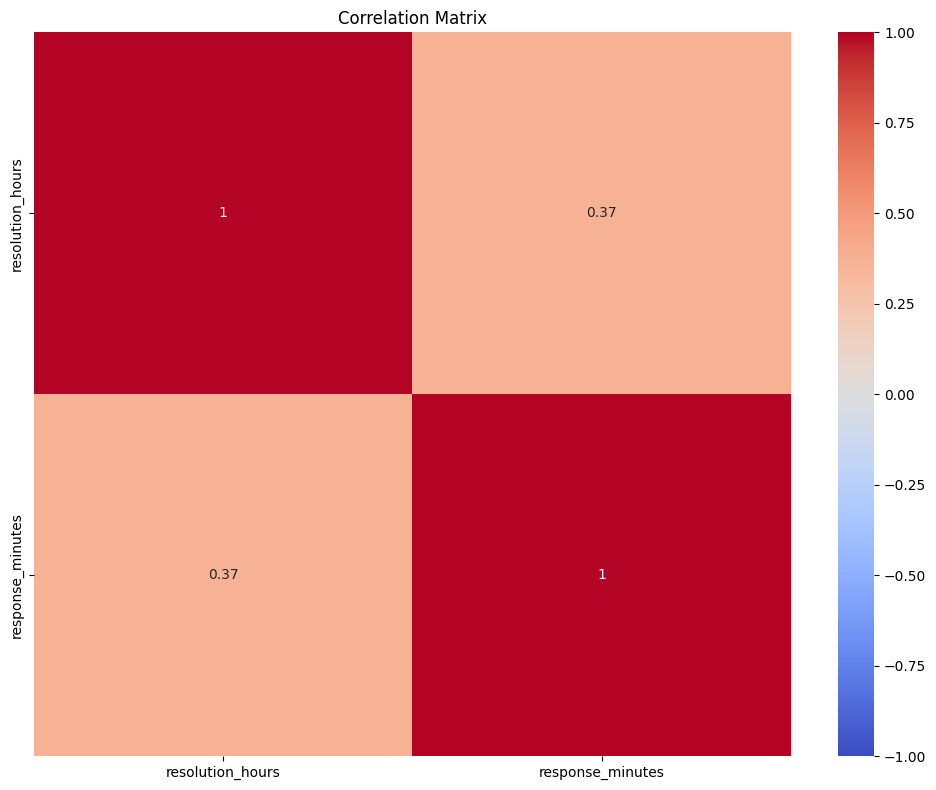

In [175]:
# Create a correlation matrix for numerical variables
corr_columns = ['resolution_hours', 'response_minutes']
corr_matrix = cleaned_df[corr_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()

- The Response Minutess has a weak positive correlation to Resolution Hours, as the Response Minutes of the ticket increases, the Resolution Hours also increase.

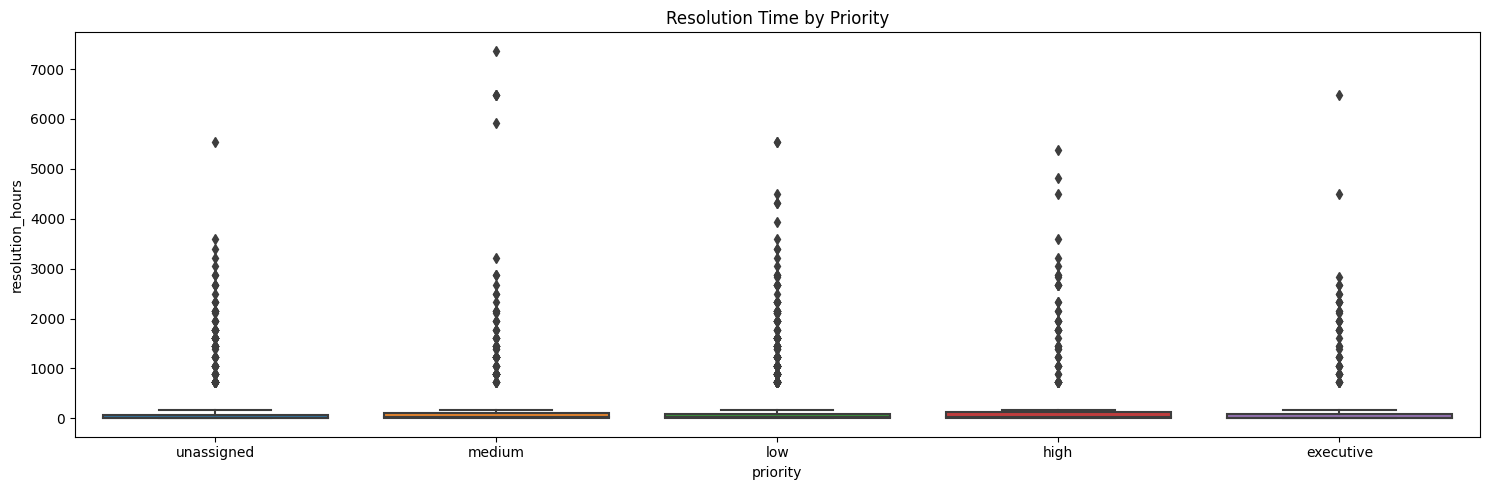

In [177]:
# Check if priority affects resolution time
if df['priority'].notna().any():
    plt.figure(figsize=(15, 5))
    sns.boxplot(x='priority', y='resolution_hours', data=cleaned_df)
    plt.title('Resolution Time by Priority')
    plt.tight_layout()

- The Priority plots show similar statistics.
- The isolated points in the Priority box plot are outliers, which is expected in employee performance datasets.

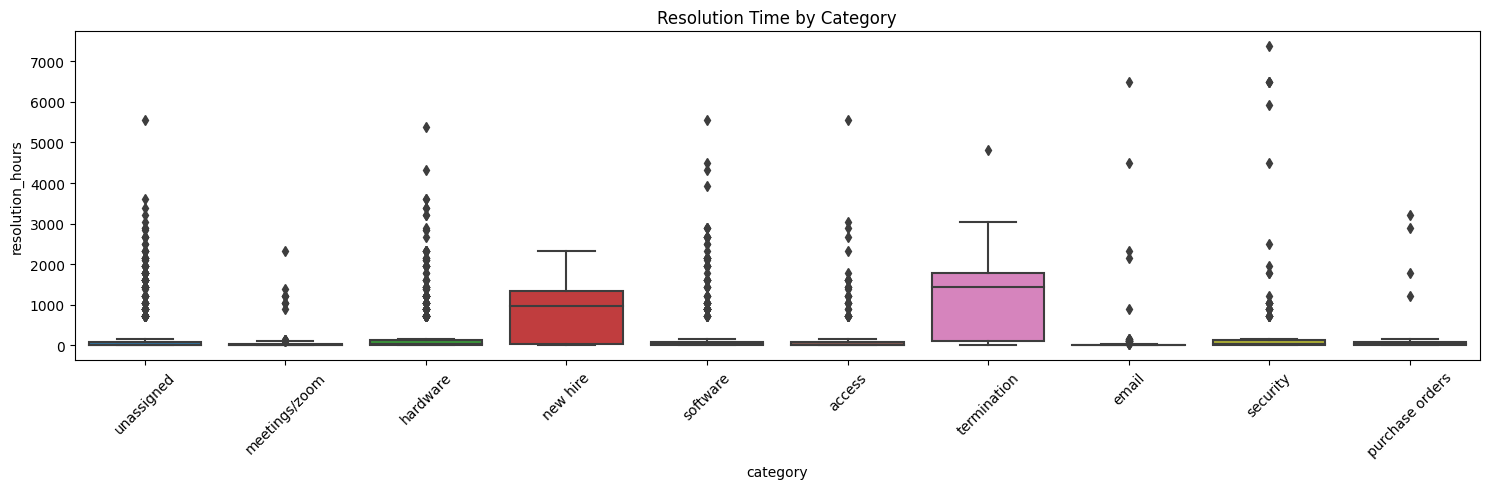

In [178]:
# Check if category affects resolution time
if df['category'].notna().any():
    plt.figure(figsize=(15, 5))
    sns.boxplot(x='category', y='resolution_hours', data=cleaned_df)
    plt.title('Resolution Time by Category')
    plt.xticks(rotation=45)
    plt.tight_layout()

- The Category plots show similar statistics except for New_hire and Termination.
- The plot of New_hire tells that their Resolution Hours is between 0 and 1500 hours with a median of 1000 hours. While in the Termination plot, the Resolution Hours is between 50 and 2000 with a median of 1800 hours. Most of the hours in both plots are in the lower quartile (25th percentile)
- The isolated points in most of the Category box plot are outliers, which is expected in employee performance datasets.

----

#### Workload Analysis

In [180]:
# Analyze workload distribution
workload = cleaned_df.groupby(['ticket_owner', 'created_date']).size().reset_index()
workload.columns = ['ticket_owner', 'date', 'ticket_count']
print(workload)

# Calculate average daily workload
avg_daily_workload = workload.groupby('ticket_owner')['ticket_count'].mean().reset_index()
avg_daily_workload = avg_daily_workload.sort_values('ticket_count', ascending=False)
print(avg_daily_workload)

     ticket_owner        date  ticket_count
0        alan lee  2024-01-08             1
1        alan lee  2024-01-22             1
2        alan lee  2024-02-28             1
3        alan lee  2024-05-23             1
4        alan lee  2024-06-07             1
...           ...         ...           ...
1733   unassigned  2024-12-20             1
1734   unassigned  2024-12-23             2
1735   unassigned  2024-12-24             1
1736   unassigned  2024-12-26             1
1737   unassigned  2024-12-27             1

[1738 rows x 3 columns]
      ticket_owner  ticket_count
8        max franz      4.065502
3        jason tom      3.514423
1     eric willson      3.387097
6     kenneth king      3.307018
11   steven squier      3.110619
12     tatiana lee      2.583333
9    phillip davis      2.465241
5    kamyar zabeti      2.242424
7   larry jennings      2.000000
10        rene lim      2.000000
4       jerry itoh      1.915385
2      gary pitman      1.717391
13      unassigned

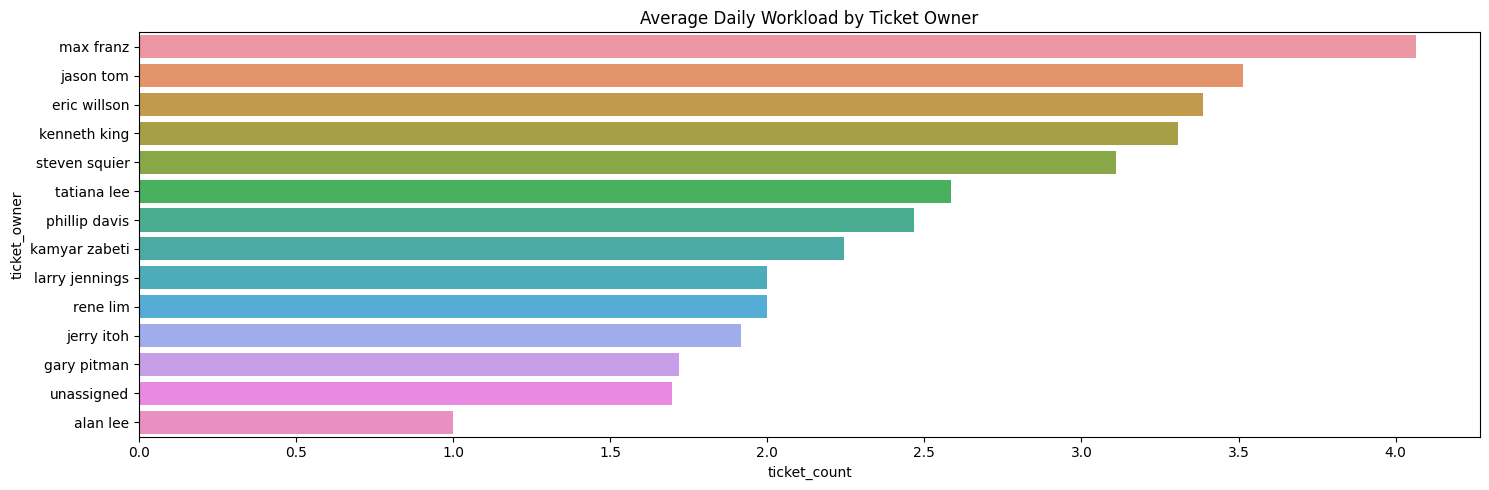

In [ ]:
# Visualize average daily workload
plt.figure(figsize=(15, 5))
sns.barplot(x='ticket_count', y='ticket_owner', data=avg_daily_workload)
plt.title('Average Daily Workload by Ticket Owner')
plt.tight_layout()

----

### Performance Socring System

**Attention:**

The scoring system was developed based on my own knowledge of the performance scoring system. 

Still, need more research and industry knowledge to apply the best weight for the system. Moreover, I think it's better to include the number of tickets in the overall score as I believe it will provide a higher accuracy.

In [ ]:
# Create a performance scoring system

# Normalize response time (lower is better)
max_response = avg_response_by_owner['response_minutes'].max()
avg_response_by_owner['response_score'] = 1 - (avg_response_by_owner['response_minutes'] / max_response)

# Normalize resolution time (lower is better)
max_resolution = avg_resolution_by_owner['resolution_hours'].max()
avg_resolution_by_owner['resolution_score'] = 1 - (avg_resolution_by_owner['resolution_hours'] / max_resolution)

# Combine all scores
performance_scores = pd.merge(avg_response_by_owner[['ticket_owner', 'response_score']], 
                             avg_resolution_by_owner[['ticket_owner', 'resolution_score']], 
                             on='ticket_owner', how='outer')

# Add closure rate score
closure_rate['closure_score'] = closure_rate['closure_rate'] / 100
performance_scores = pd.merge(performance_scores, 
                             closure_rate[['ticket_owner', 'closure_score']], 
                             on='ticket_owner', how='outer')

# Calculate overall score (weighted average)
performance_scores['overall_score'] = (
    performance_scores['response_score'] * 0.3 + 
    performance_scores['resolution_score'] * 0.4 + 
    performance_scores['closure_score'] * 0.3
)

# Sort by overall score
performance_scores = performance_scores.sort_values('overall_score', ascending=False)

In [72]:
performance_scores

,ticket_owner,response_score,resolution_score,closure_score,overall_score
1,jerry itoh,0.936606,0.960608,1.000000,0.965225
3,eric willson,0.907986,0.875762,0.979592,0.916578
7,kamyar zabeti,0.866999,0.928486,0.898649,0.901089
6,tatiana lee,0.889286,0.954093,0.838710,0.900036
5,jason tom,0.901738,0.852099,0.948016,0.895766
4,steven squier,0.905220,0.813844,0.984353,0.892410
11,rene lim,0.798286,0.848506,1.000000,0.878888
10,kenneth king,0.802731,0.795078,1.000000,0.858851
8,phillip davis,0.815622,0.736390,0.965293,0.828830
2,max franz,0.910220,0.666263,0.873255,0.801548


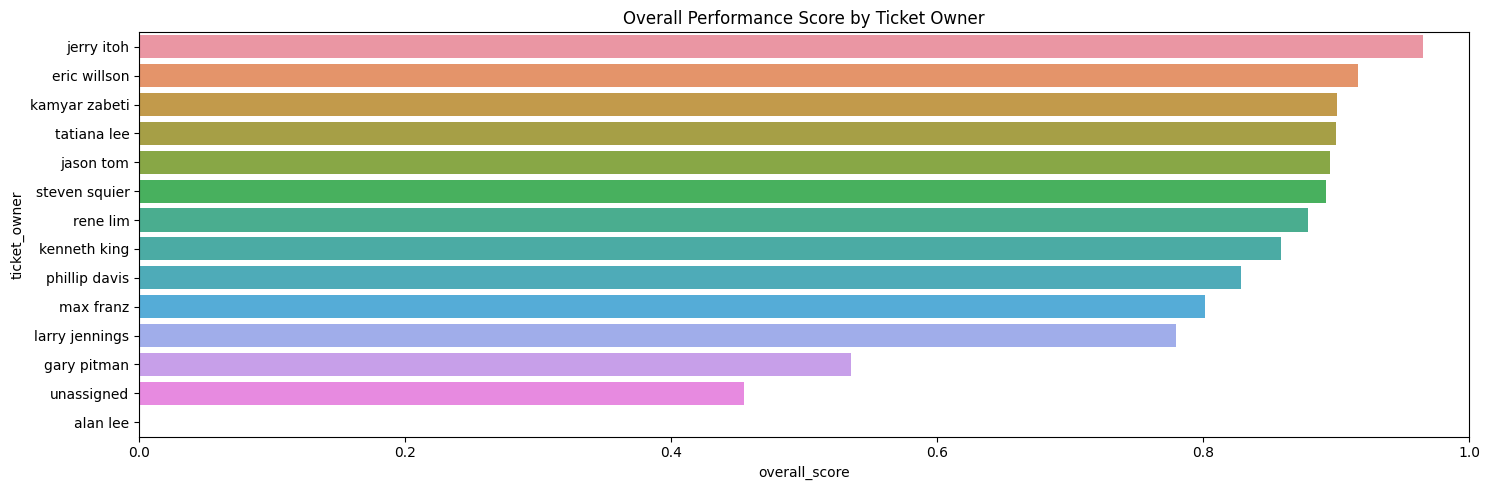

In [ ]:
# Visualize performance scores
plt.figure(figsize=(15, 5))
sns.barplot(x='overall_score', y='ticket_owner', data=performance_scores)
plt.title('Overall Performance Score by Ticket Owner')
plt.xlim(0, 1)
plt.tight_layout()

- Lower response time = higher score
- Higher closure rate = higher score
- Balanced workload handling = higher score

----

### Identify Patterns & Insights

In [181]:
# Find patterns in high-performing employees
top_performers = performance_scores.head(5)['ticket_owner'].tolist()
top_performers_data = cleaned_df[cleaned_df['ticket_owner'].isin(top_performers)]

# Analyze what categories top performers handle
top_category_distribution = pd.crosstab(top_performers_data['ticket_owner'], 
                                      top_performers_data['category'], 
                                      normalize='index')

# Analyze what priorities top performers handle
top_priority_distribution = pd.crosstab(top_performers_data['ticket_owner'], 
                                      top_performers_data['priority'], 
                                      normalize='index')

print("Category distribution for top performers:\n") 
display(top_category_distribution)

print("\nPriority distribution for top performers:\n")
display(top_priority_distribution)

Category distribution for top performers:



category,access,email,hardware,meetings/zoom,new hire,purchase orders,security,software,termination,unassigned
ticket_owner,,,,,,,,,,
eric willson,0.127891,0.146939,0.006803,0.065306,0.001361,0.002721,0.065306,0.058503,0.001361,0.523810
jason tom,0.341997,0.004104,0.300958,0.020520,0.002736,0.000000,0.036936,0.221614,0.001368,0.069767
jerry itoh,0.016064,0.004016,0.004016,0.000000,0.000000,0.000000,0.004016,0.000000,0.000000,0.971888
kamyar zabeti,0.020270,0.000000,0.067568,0.000000,0.000000,0.000000,0.027027,0.195946,0.000000,0.689189
tatiana lee,0.032258,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.419355,0.000000,0.516129



Priority distribution for top performers:



priority,executive,high,low,medium,unassigned
ticket_owner,,,,,
eric willson,0.068027,0.077551,0.161905,0.182313,0.510204
jason tom,0.110807,0.005472,0.797538,0.017784,0.068399
jerry itoh,0.092369,0.004016,0.016064,0.000000,0.887550
kamyar zabeti,0.020270,0.006757,0.229730,0.060811,0.682432
tatiana lee,0.064516,0.000000,0.451613,0.000000,0.483871


In [182]:
# Find bottlenecks - identify tickets with longest resolution times
bottlenecks = cleaned_df.nlargest(10, 'resolution_hours')
print("\nTop 10 tickets with longest resolution times:\n")
bottlenecks[['subject', 'ticket_owner', 'category', 'priority', 'resolution_hours']]


Top 10 tickets with longest resolution times:



,subject,ticket_owner,category,priority,resolution_hours
769,"fw: [external] re: ukathleen kissane <kathleen.kissane@ukg.com>kg ic introduction, request for 360 integration, chinese hospital cna dues ukg integration (chi1036unassigned2023unassigned00441194)",gary pitman,security,medium,7368.0
800,installing sentinelone on lenovo laptop,eric willson,security,medium,6480.0
801,installing sentinelone on lenovo laptop,eric willson,security,medium,6480.0
805,installing sentinelone on lenovo laptop,eric willson,security,medium,6480.0
1154,create 2 nnu emails,gary pitman,email,executive,6480.0
802,installing sentinelone on lenovo laptop,eric willson,security,medium,5928.0
561,updating security software unassigned oakunassigneddt1016 & oakunassignedlt4472,steven squier,software,low,5544.0
756,links,gary pitman,access,low,5544.0
1710,fw: mmc union dues file feed,gary pitman,unassigned,unassigned,5544.0
1817,security and wifi for cafe/event area,unassigned,hardware,high,5376.0


----

### Actionable Insights

In [ ]:
# Generate key insights and recommendations
insights = []

# Calculate average metrics
avg_resolution = cleaned_df['resolution_hours'].mean()
avg_response = cleaned_df['response_minutes'].mean()

# Calculate resolution and response times against the team average
# Individual Resolution Hours / Team Average Resolution Hours = Relative Efficiency Score 
avg_resolution_by_owner['resolution_vs_avg'] = (avg_resolution_by_owner['resolution_hours'] / avg_resolution)
avg_response_by_owner['response_vs_avg'] = (avg_response_by_owner['response_minutes'] / avg_response)


# Compare individual performance to team average
performance_vs_average = pd.merge(avg_resolution_by_owner[['ticket_owner', 'resolution_vs_avg']], 
                          avg_response_by_owner[['ticket_owner', 'response_vs_avg']],
                             on='ticket_owner', how='outer')

performance_vs_average = pd.merge(performance_vs_average, performance_scores[['ticket_owner', 'overall_score']],
                             on='ticket_owner', how='outer')

performance_vs_average

,ticket_owner,resolution_vs_avg,response_vs_avg,overall_score
0,larry jennings,0.132478,0.502946,0.780027
1,jerry itoh,0.152023,0.510364,0.965225
2,tatiana lee,0.177166,0.891323,0.900036
3,alan lee,0.191742,NaN,NaN
4,kamyar zabeti,0.275985,1.070752,0.901089
5,eric willson,0.479459,0.740780,0.916578
6,jason tom,0.570780,0.791080,0.895766
7,rene lim,0.584646,1.623941,0.878888
8,steven squier,0.718411,0.763045,0.892410
9,kenneth king,0.790834,1.588151,0.858851


- When divide an individual's "resolution hours" by the "team average resolution hours," I'am calculating how many times faster or slower that individual is resolving issues compared to the average team member, providing a relative measure of their efficiency in resolving issues compared to the team as a whole. 

**Interpretation**

- A result greater than 1 indicates the individual is taking longer than the team average to resolve issues, while a result less than 1 means they are resolving issues faster than the average team member.


In [183]:
# Format insights
print("\nKey Insights:")
print(f"- Team average resolution time: {avg_resolution:.2f} hours")
print(f"- Team average response time: {avg_response:.2f} minutes")

# Top performers
print("\nTop Performers Efficiency Score:")
for owner in top_performers:
    owner_data = performance_vs_average[performance_vs_average['ticket_owner'] == owner]
    print(f"- {owner}: Overall score {owner_data['overall_score'].values[0]:.2f}")
    
    # Resolution time compared to average
    if owner_data['resolution_vs_avg'].values[0] < 1:
        print(f"  Resolves tickets {(1-owner_data['resolution_vs_avg'].values[0])*100:.0f}% FASTER than team average")
    else:
        print(f"  Resolves tickets {(owner_data['resolution_vs_avg'].values[0]-1)*100:.0f}% SLOWER than team average")
    
    # Response time compared to average
    if owner_data['response_vs_avg'].values[0] < 1:
        print(f"  Responds {(1-owner_data['response_vs_avg'].values[0])*100:.0f}% FASTER than team average")
    else:
        print(f"  Responds {(owner_data['response_vs_avg'].values[0]-1)*100:.0f}% SLOWER than team average")


Key Insights:
- Team average resolution time: 197.35 hours
- Team average response time: 1322.21 minutes

Top Performers Efficiency Score:
- jerry itoh: Overall score 0.97
  Resolves tickets 85% FASTER than team average
  Responds 49% FASTER than team average
- eric willson: Overall score 0.92
  Resolves tickets 52% FASTER than team average
  Responds 26% FASTER than team average
- kamyar zabeti: Overall score 0.90
  Resolves tickets 72% FASTER than team average
  Responds 7% SLOWER than team average
- tatiana lee: Overall score 0.90
  Resolves tickets 82% FASTER than team average
  Responds 11% FASTER than team average
- jason tom: Overall score 0.90
  Resolves tickets 43% FASTER than team average
  Responds 21% FASTER than team average


In [ ]:
# Areas for improvement
print("\nAreas for Improvement:")
# Identify categories with longest average resolution times
category_resolution = cleaned_df.groupby('category')['resolution_hours'].mean().reset_index()
category_resolution = category_resolution.sort_values('resolution_hours', ascending=False)

print(f"- Slowest Categories to Resolve:")
for i, row in category_resolution.head(4).iterrows():
    print(f"  {row['category']}: {row['resolution_hours']:.2f} hours")

# Identify employees who may need additional training/support
# Low performers are those have the overall score less than 80
low_performers = performance_scores.tail(4)['ticket_owner'].tolist()
print("\n- Employees Who May Benefit From Additional Training:")
for owner in low_performers:
    owner_data = performance_scores[performance_scores['ticket_owner'] == owner]
    print(f"  {owner}: Overall score {owner_data['overall_score'].values[0]:.2f}")


Areas for Improvement:
- Slowest Categories to Resolve:
  termination: 1288.09 hours
  new hire: 828.28 hours
  security: 396.07 hours
  hardware: 282.89 hours

- Employees Who May Benefit From Additional Training:
  larry jennings: Overall score 0.78
  gary pitman: Overall score 0.54
  unassigned: Overall score 0.45
  alan lee: Overall score nan


----

**Reccomendations**

- Consider implementing peer learning sessions where top performers share their approaches
- Provide targeted training for employees handling categories with longer resolution times
- Review workload distribution to ensure balanced assignments across the team
- Set up clear SLAs for different ticket categories and priorities
- Implement regular performance reviews based on the metrics analyzed